In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
##random sampling

In [4]:
#creates sample table of specified size
def create_sample_table (nrow, data):
    sample_table = np.empty(shape=(nrow, data.shape[1]))
    for c in range (0,sample_table.shape[1]):
        sample_table[:,c] = np.random.choice (data[:,c], nrow, replace = False)
    return sample_table

In [5]:
#get the MSE for one dataset, aggregate, and sample table size
def MSE_one_example (sample_table_nrows, data, aggregate, quantile):
    sample_table = create_sample_table (sample_table_nrows, data)
    MSE = 0
    for c in range (0,sample_table.shape[1]):
        if (quantile != 0):
            actual = aggregate(data[:,c], quantile)
            sample = aggregate(sample_table[:,c], quantile)
            MSE += (actual-sample)**2
        else:
            actual = aggregate(data[:,c])
            sample = aggregate(sample_table[:,c])
            MSE += (actual-sample)**2 
    MSE = MSE/sample_table.shape[1]
    return MSE

In [6]:
#prints MSE results for different sample table sizes
def get_results (sample_table_sizes, data, aggregate, i, dataset_size):    
    aggregate_mse = []
    for sample_table_ratio in sample_table_sizes:
        aggregate_mse.append(MSE_one_example (round(sample_table_ratio*data.shape[0]), data, aggregate, quantile = i))
    print ("***New Example***")
    print ("dataset size: ")
    print(dataset_size)
    print ("aggregate: ")
    print(aggregate)
    print ("quantile: ")
    print (i)
    print ("sample table sizes: ")
    print(sample_table_sizes)
    print ("MSE values: ")
    print(aggregate_mse)
    plt.plot (sample_table_sizes, aggregate_mse)
    plt.pause(0.05)
    plt.show()
    print ("********") 

In [7]:
#takes in list of dataset sizes, list of aggregates, list of sample table sizes and plots MSE vs. sample table
#size for each dataset
#***dataset is ~N(0,1)
#@param dataset_sizes (list of tuples)
#@param aggregates (list of numpy aggregates on one column)
#@param sample_table_sizes (list of numbers representing ratios of sample table size to data table size)
#@param outliers (whether to do simple outliers test)
def eval_random_sampling_MSE (dataset_sizes, aggregates, sample_table_sizes, outliers, stdev):
    for dataset_size in dataset_sizes:
        data = np.random.normal(loc = 0, scale = stdev, size=dataset_size)
        if (outliers):
            for c in range (0, data.shape[1]):
                for r in range (0, data.shape[0]):
                    if (r%200 == 0):
                        data [r, c] += 100   
        for aggregate in aggregates:
            if (aggregate == np.quantile):
                for i in [.1, .25, .5, .75]:
                    get_results (sample_table_sizes, data, aggregate, i, dataset_size)
            else:
                get_results (sample_table_sizes, data, aggregate, 0, dataset_size)
    plt.show()

In [8]:
#Test on some examples
#dataset_sizes = [(100, 100), (250, 250), (500, 500), (1000, 1000), (2500, 2500), (5000, 5000)]
dataset_sizes = [(10000, 50), (20000, 50), (30000, 50), (40000, 50), (50000, 50)]

aggregates = [np.mean, np.std, np.amax, np.quantile]
sample_table_sizes = [.01, .05, .1, .25, .5, .75, .9]

***New Example***
dataset size: 
(100, 100)
aggregate: 
<function mean at 0x11421b950>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.9825674408679046, 0.23256514390499133, 0.08691758157961611, 0.029690811006457585, 0.009044815620722835, 0.0029740945141646037, 0.0008287850604041757]


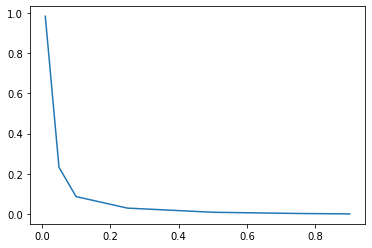

********
***New Example***
dataset size: 
(100, 100)
aggregate: 
<function std at 0x11421bae8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.9780837175245, 0.09744317989941513, 0.04436837014882979, 0.011968719950458227, 0.005368581136026718, 0.0017474122271537746, 0.00044265374067086936]


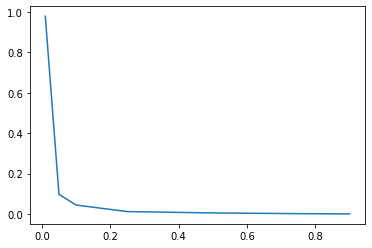

********
***New Example***
dataset size: 
(100, 100)
aggregate: 
<function amax at 0x114217bf8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[8.052220562869604, 2.4221596264877405, 1.350503733260188, 0.5994147449365279, 0.1958589266972007, 0.0946532625046935, 0.053606480796624376]


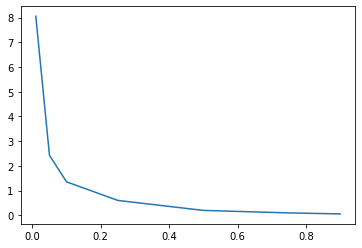

********
***New Example***
dataset size: 
(100, 100)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.1
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[2.284207514220932, 0.36187588004895327, 0.20645637169182396, 0.05927018115728948, 0.032619922512421254, 0.01065778343779903, 0.005165848893534925]


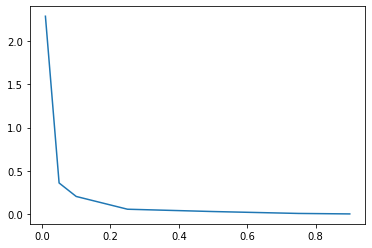

********
***New Example***
dataset size: 
(100, 100)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.25
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[1.565421165938993, 0.34424841970611203, 0.1330710432207126, 0.05167979756580989, 0.022910123480574404, 0.006722705911822982, 0.0038681997676391165]


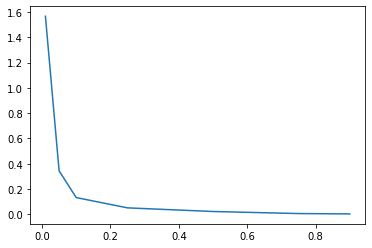

********
***New Example***
dataset size: 
(100, 100)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.5
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.9052526524687374, 0.3346471844131228, 0.14910630602050684, 0.044733186497554506, 0.020357648194584556, 0.006770673980345784, 0.0021960442273228557]


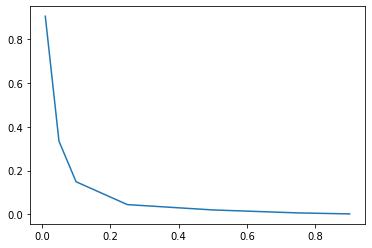

********
***New Example***
dataset size: 
(100, 100)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.75
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[1.7315969642817672, 0.3486039265813718, 0.15380858823540153, 0.04672212004518851, 0.017576684643931063, 0.005696461273152192, 0.002451202596398768]


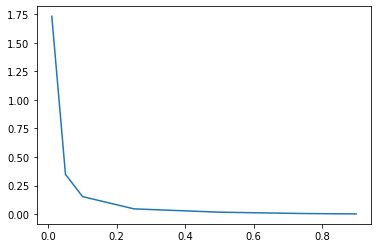

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function mean at 0x11421b950>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.47651021132758264, 0.08105885366594946, 0.037368465111392454, 0.01357912650306452, 0.0036506558929879644, 0.001465305700464973, 0.00044001481044760304]


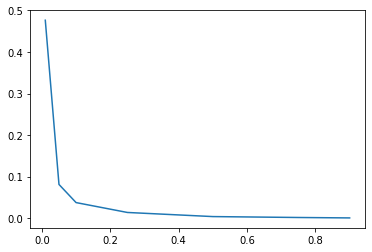

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function std at 0x11421bae8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.36639989002497136, 0.04134269912641496, 0.01855224937958474, 0.006557414183366177, 0.00207250733857506, 0.0006425642504248011, 0.00018823974114891132]


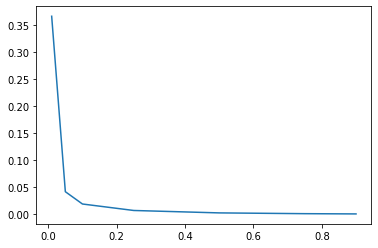

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function amax at 0x114217bf8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[6.1508925020730105, 1.7333830256950695, 0.9850689809283226, 0.43982608215307945, 0.1672215146301208, 0.03790573115045996, 0.013618951979446136]


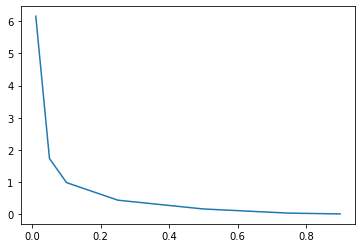

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.1
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[1.3735737782262616, 0.24063699699554103, 0.08504203797681957, 0.03572413899450299, 0.013814010241513767, 0.004735995122277578, 0.0018684219012544895]


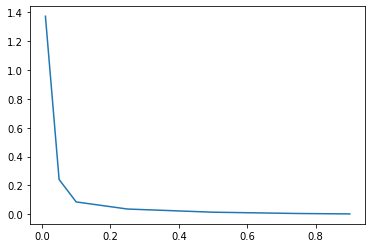

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.25
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.7116586019892428, 0.14890626607524202, 0.06688669533786806, 0.01930117758823464, 0.0070196690835877375, 0.0027364165921243146, 0.001258354801850332]


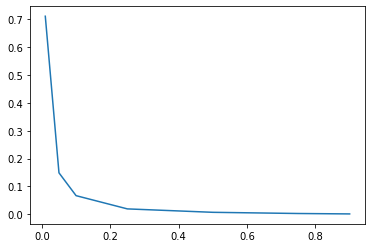

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.5
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.44790461318495, 0.12016247012490848, 0.06391901889029919, 0.023778781091463613, 0.005633915143855331, 0.001927769783700471, 0.0008540910515503164]


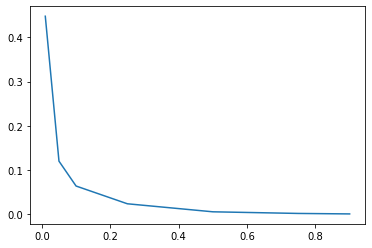

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.75
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.6228179028102973, 0.14943264571117376, 0.057470620824027915, 0.026662564555508587, 0.007660308974891353, 0.002684324205329589, 0.0011119963899036557]


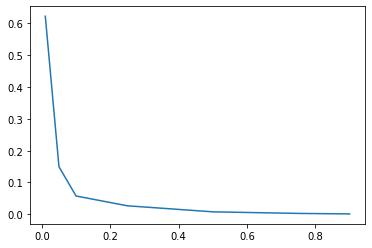

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function mean at 0x11421b950>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.1835443533634503, 0.037919381639581355, 0.01921417758491494, 0.00630975241293824, 0.0019140941028558858, 0.000640359361094302, 0.00022707132462456136]


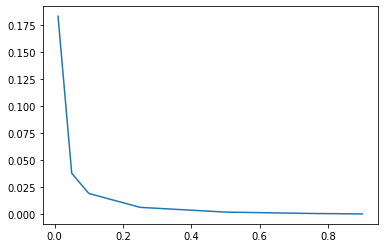

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function std at 0x11421bae8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.10968638687038253, 0.018613292582429167, 0.008163883244986956, 0.002842597703438098, 0.0010587674278875008, 0.00034253617328469584, 0.0001132443794930271]


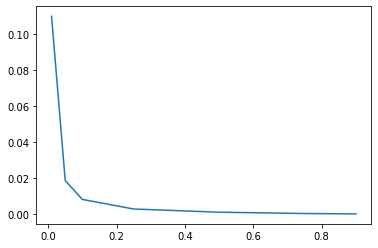

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function amax at 0x114217bf8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[3.872204096161007, 1.4503500310243596, 0.8962523748068457, 0.41188223985939393, 0.15211186116438488, 0.054067212586009175, 0.01559964185076732]


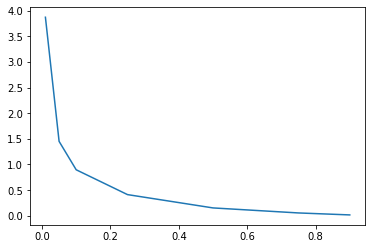

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.1
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.4735625060557422, 0.10204418061673101, 0.05283457316400316, 0.017132799865404447, 0.006378932810103857, 0.002432849803272655, 0.0007828288253185963]


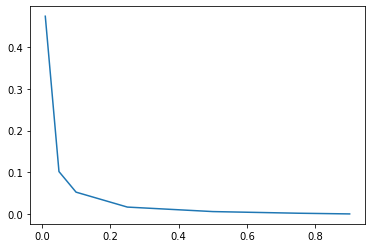

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.25
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.36225457690869667, 0.0718431165725588, 0.031881846738800845, 0.01089455552632466, 0.003780247003249534, 0.0012845837706772563, 0.0005336457600017467]


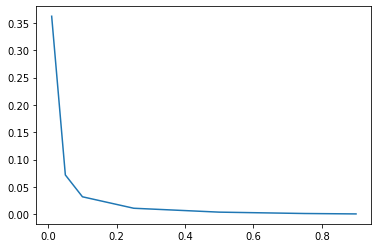

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.5
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.2952981218021715, 0.06172827831217948, 0.025671919861882046, 0.009107487178796933, 0.0032477222403870716, 0.0012903823798607807, 0.00038345624436354487]


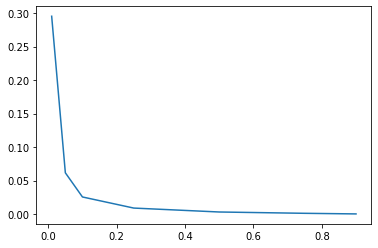

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.75
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.36117283001411393, 0.07036955216928525, 0.03349095094937466, 0.010681015192150973, 0.003945747467302463, 0.00126843082496562, 0.0004706770536065178]


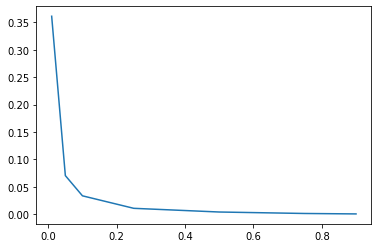

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function mean at 0x11421b950>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.10929666203822667, 0.01871832364998724, 0.009142765539115031, 0.002838772777976355, 0.0010246388472109548, 0.00032808338017093115, 0.00011303229568288231]


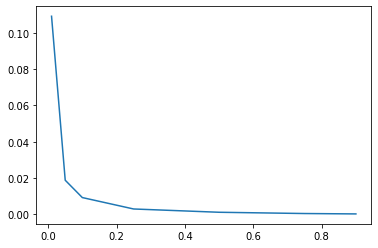

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function std at 0x11421bae8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.053784565188733445, 0.00948228280312435, 0.004517582986839716, 0.0013193519807087554, 0.0004998840793145011, 0.00016693116545098634, 6.131076687217048e-05]


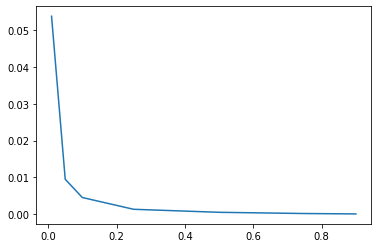

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function amax at 0x114217bf8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[3.310786001002017, 1.193354158156589, 0.7486717922116399, 0.30733201054017917, 0.14105852018202739, 0.04869630867921791, 0.024440762090639334]


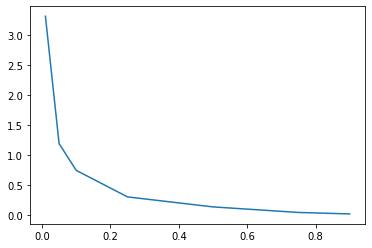

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.1
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.2583867950711245, 0.0575666208832846, 0.02781319386232357, 0.009350356000463035, 0.002990883744981589, 0.0010622839186891807, 0.000409136672757121]


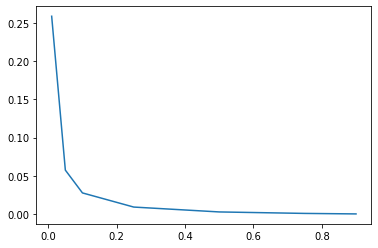

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.25
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.16910150614839994, 0.035911501918114284, 0.01589935261617078, 0.00532757572502829, 0.0018421680773810243, 0.0006485618189153928, 0.00023780856050662375]


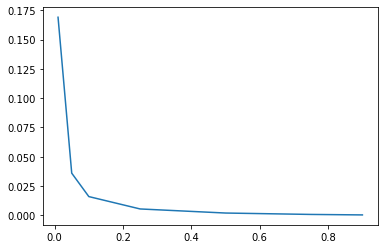

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.5
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.15299338644660498, 0.02785992628509068, 0.014112069978111071, 0.005050513091419677, 0.0017243994041772725, 0.0005598630943375201, 0.00020389645667995954]


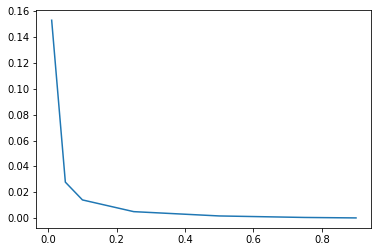

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.75
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.16726335477315, 0.036281919553013235, 0.016151655944850213, 0.00536875911724543, 0.001981783387875556, 0.0007070431971119008, 0.00023986156114779513]


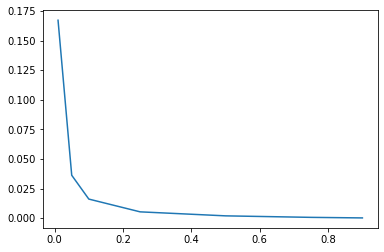

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function mean at 0x11421b950>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.038338236219750875, 0.007825832124673476, 0.003564030478222435, 0.0011938680521487574, 0.00040367979273170054, 0.00013159659013782412, 4.4273066488345755e-05]


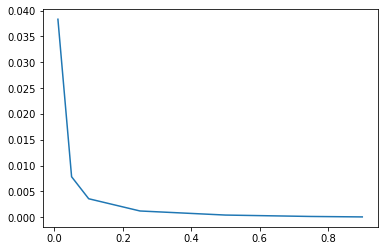

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function std at 0x11421bae8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.020645397642664026, 0.0039731598969961045, 0.001774501698304258, 0.0005577339371892809, 0.00020168848545151357, 6.671599148166702e-05, 2.2133465445487287e-05]


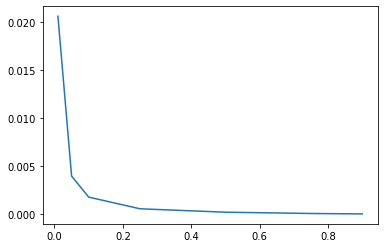

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function amax at 0x114217bf8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[2.6709546524805066, 1.101496519387017, 0.6589468911419898, 0.2946946543411016, 0.11805458838859915, 0.04233848500675584, 0.016925179268452925]


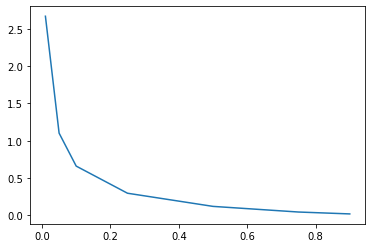

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.1
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.10717736644511783, 0.021350619842871604, 0.01085143511621431, 0.003652967022240287, 0.0012005907072284803, 0.00043130519087586014, 0.0001473373487072956]


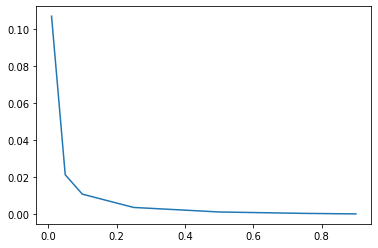

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.25
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.07459414761843329, 0.013045837014615128, 0.00662975052745579, 0.0022635494906428056, 0.0007539222819651543, 0.0002576643870462658, 9.556366615441302e-05]


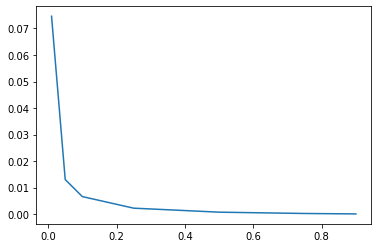

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.5
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.05857191035294849, 0.011801168614142994, 0.005560287284202587, 0.0019881017059792867, 0.0006765214209576664, 0.00021835075262091345, 7.70305231221281e-05]


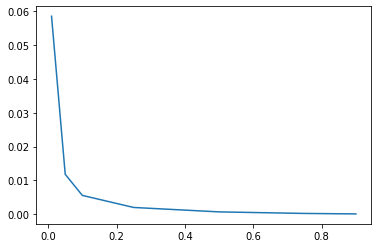

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.75
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.07349072970009991, 0.014240447713826026, 0.006752138317523818, 0.00237534569265042, 0.0007889857238891425, 0.00027625084448324464, 9.089660143439814e-05]


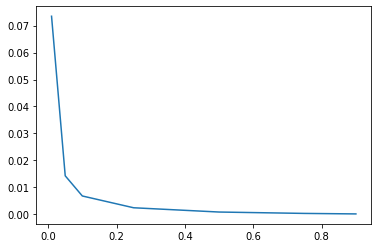

********
***New Example***
dataset size: 
(5000, 5000)
aggregate: 
<function mean at 0x11421b950>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.0198657450808286, 0.003861478264819732, 0.0018197005108700126, 0.0006055107673775389, 0.00020137603920826748, 6.689137131904555e-05, 2.2355068474535895e-05]


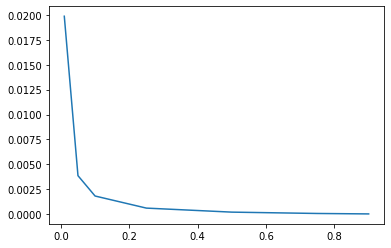

********
***New Example***
dataset size: 
(5000, 5000)
aggregate: 
<function std at 0x11421bae8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.009950311536865831, 0.002017558040161539, 0.0009162915631964284, 0.0002940066271377941, 9.814260654028525e-05, 3.3347348902831395e-05, 1.1334086225609196e-05]


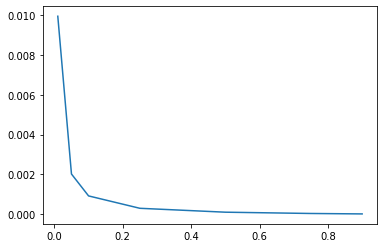

********
***New Example***
dataset size: 
(5000, 5000)
aggregate: 
<function amax at 0x114217bf8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[2.335965786259454, 0.9481091563403549, 0.6100299229653043, 0.2731304248818734, 0.11268169396215014, 0.04189911180396066, 0.01348880810405866]


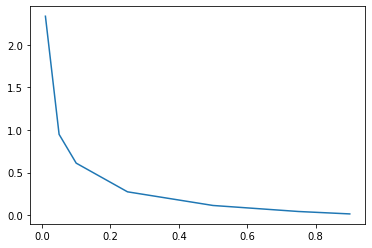

********
***New Example***
dataset size: 
(5000, 5000)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.1
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.05684124839932316, 0.011137692160907714, 0.005143536282693393, 0.001823415321844504, 0.000613185427228461, 0.00020919256954793483, 7.235507886608605e-05]


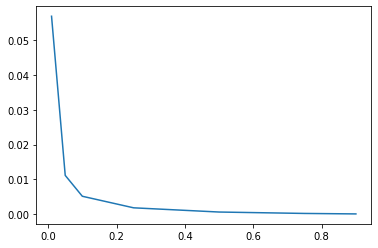

********
***New Example***
dataset size: 
(5000, 5000)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.25
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.036109470191650235, 0.0071723900494253985, 0.0033602495141501856, 0.0011156673147537917, 0.00038555592960924824, 0.00012763469046655332, 4.513544176581027e-05]


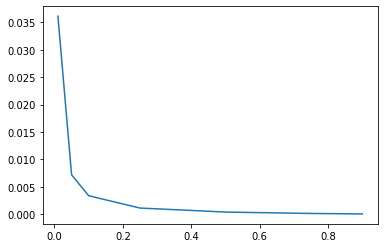

********
***New Example***
dataset size: 
(5000, 5000)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.5
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.02910657104482401, 0.006051417020191205, 0.0028780923806342486, 0.0009465515564935565, 0.0003225412728315347, 0.0001096816172035076, 3.786035495966824e-05]


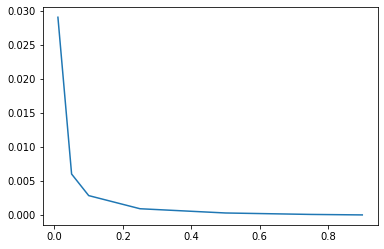

********
***New Example***
dataset size: 
(5000, 5000)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.75
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.035503893591969135, 0.007085131576940896, 0.003452715154247155, 0.0011430538256814004, 0.0003656155951740628, 0.0001260522699320495, 4.546855415704335e-05]


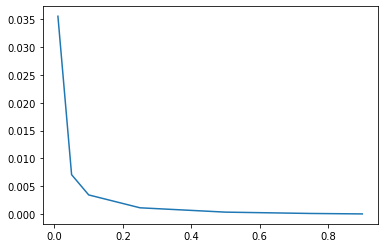

********


In [9]:
eval_random_sampling_MSE (dataset_sizes, aggregates, sample_table_sizes, False, 1)

***New Example***
dataset size: 
(100, 100)
aggregate: 
<function mean at 0x11421b950>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[103.22777889667961, 11.986575526862877, 6.609710172631627, 2.5350086101458515, 1.0207857680152166, 0.3232554231253629, 0.09146244472503573]


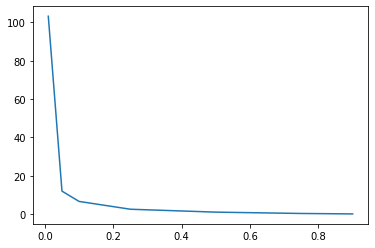

********
***New Example***
dataset size: 
(100, 100)
aggregate: 
<function std at 0x11421bae8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[99.86128729887336, 132.076652977905, 123.52208145672263, 83.98461541320859, 51.906182455929574, 21.117150760470178, 10.853146390181372]


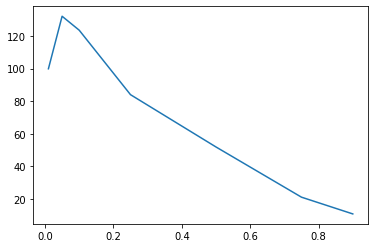

********
***New Example***
dataset size: 
(100, 100)
aggregate: 
<function amax at 0x114217bf8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[9885.90950253619, 9461.542261054215, 8048.21952990151, 7107.394168222551, 4183.629407869079, 2565.6249880500427, 666.2424864626257]


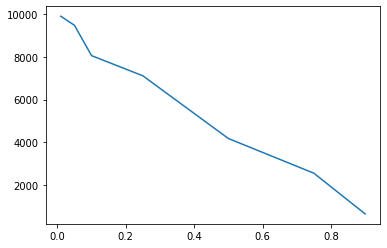

********
***New Example***
dataset size: 
(100, 100)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.1
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[2.58860363375129, 0.47070936638876154, 0.19804583180669155, 0.06263587135328835, 0.0362284295158582, 0.007246218186928076, 0.004073557370152472]


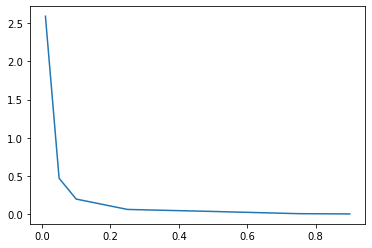

********
***New Example***
dataset size: 
(100, 100)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.25
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[1.5345596885350945, 0.2960500367390981, 0.11486004921005583, 0.06004204813732393, 0.02024208689708792, 0.008823610103533467, 0.0033738458225068234]


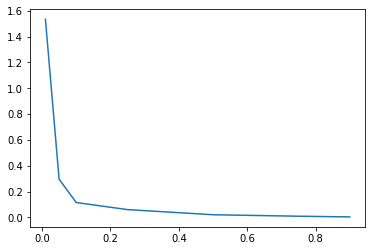

********
***New Example***
dataset size: 
(100, 100)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.5
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[397.9749425710124, 0.2784484111109848, 0.1512586673677222, 0.05278124324489233, 0.017945725549359023, 0.005706413120810589, 0.002392616627475819]


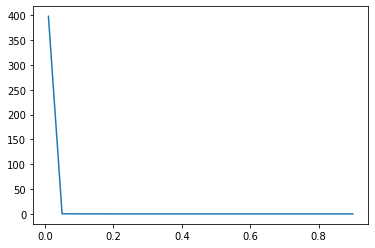

********
***New Example***
dataset size: 
(100, 100)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.75
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[1.5832466064158484, 0.3651738263793055, 0.17190292975606408, 0.05349681169084677, 0.01931404513335826, 0.0077757634186951105, 0.0035626052998519783]


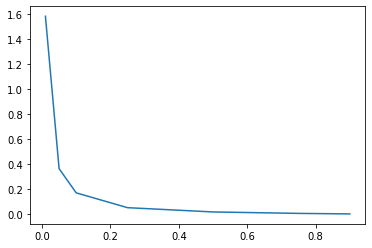

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function mean at 0x11421b950>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[30.1206124917224, 6.599088500246761, 2.798488044676715, 1.1041845305664009, 0.3155856283168096, 0.10574043984281153, 0.03366845881190299]


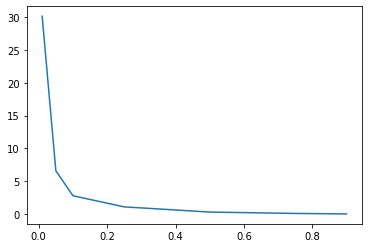

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function std at 0x11421bae8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[95.99096149557106, 90.6022962209089, 75.47488277752187, 45.54651565346227, 21.085054680281985, 4.806305019377796, 2.3702061851074716]


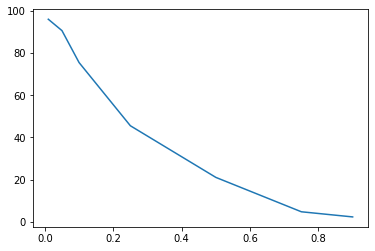

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function amax at 0x114217bf8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[9896.022168052843, 8980.719242580752, 7707.994376670109, 5266.0965916052, 2609.4478336703264, 693.2782782278572, 76.5155013067803]


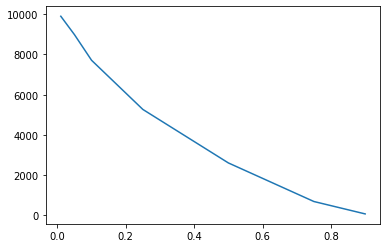

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.1
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[2.788084301128336, 0.2189825711913232, 0.10187388019203907, 0.037544007505686046, 0.012039518973983995, 0.004634643615829914, 0.0013754116705165017]


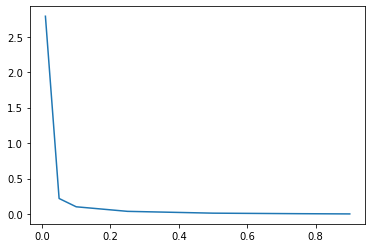

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.25
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[16.44409788457162, 0.12468075136642097, 0.06641056889035059, 0.019939948409979404, 0.009298412858426397, 0.003078379305618593, 0.0010151227673679249]


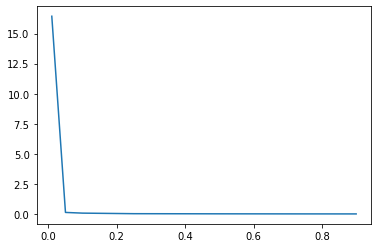

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.5
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[20.301265194755533, 0.11562126311742964, 0.05944418932135706, 0.02219152545544199, 0.0077445695045665, 0.0022213175415042854, 0.0010553483633933055]


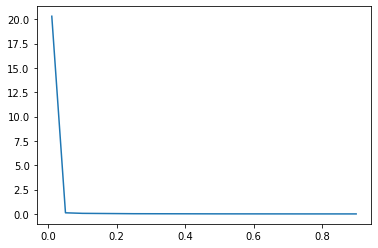

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.75
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[88.76207138939961, 0.11319310603297654, 0.06753914070663684, 0.026930570732674065, 0.007010506096146287, 0.0031984625576242606, 0.0010693370028884946]


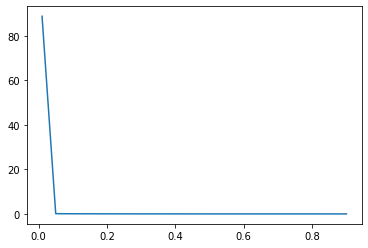

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function mean at 0x11421b950>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[10.341645114574227, 2.4726250670351297, 1.1980286216920457, 0.328690030346785, 0.12824846764361572, 0.04285050563665203, 0.012647691735425522]


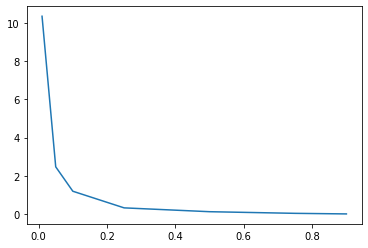

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function std at 0x11421bae8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[69.62321182378999, 63.39479940664888, 47.13518212047927, 23.67420152343518, 8.30717084884973, 2.5207401198851875, 0.697816797399546]


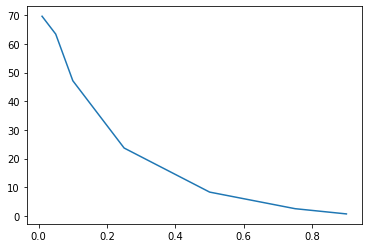

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function amax at 0x114217bf8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[9680.090720265773, 8338.690593536094, 7148.076683136374, 4156.320414539454, 1172.1163241720135, 173.22739831518797, 0.08478607841752732]


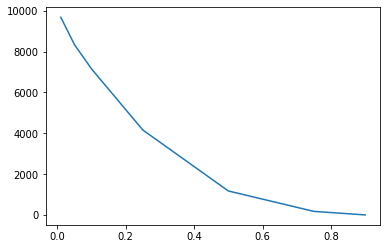

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.1
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.4820036445674955, 0.1007576923740514, 0.05195628176516458, 0.01715933112530116, 0.005847546513124659, 0.002336594935171329, 0.0007971245030311644]


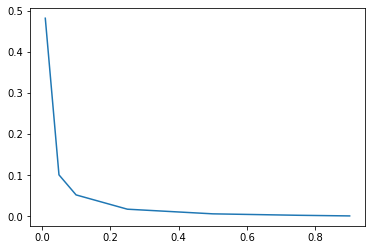

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.25
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.3466821675239478, 0.0731225091830514, 0.03363781582360232, 0.011029990527060503, 0.004020342209457723, 0.0014620816751290682, 0.0005688426196526746]


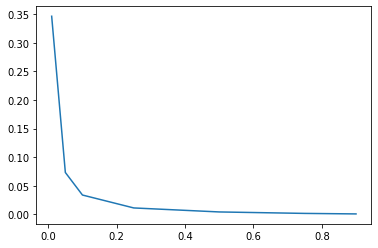

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.5
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.28762639347606833, 0.06389205167198478, 0.031711035741349765, 0.009995635295115464, 0.0033035601101978032, 0.0010990217014975917, 0.00042768047672438707]


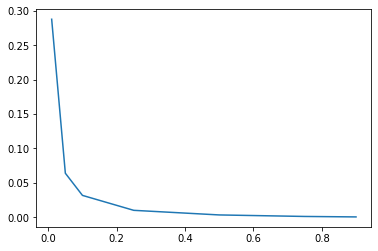

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.75
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.35208977352032433, 0.06890105734910833, 0.03556414558117996, 0.01027558164542841, 0.003678226870372351, 0.001468554899308675, 0.0005307078580369162]


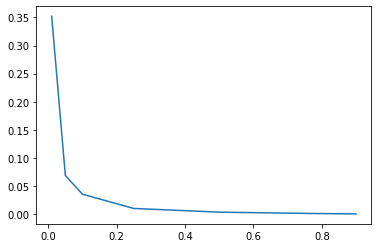

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function mean at 0x11421b950>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[5.437477472775321, 1.007585648317083, 0.4152686502851805, 0.15466188975438433, 0.04837892933619915, 0.01709575180088744, 0.006140546819078953]


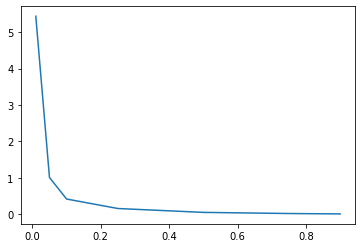

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function std at 0x11421bae8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[70.12487824401693, 42.95462142184286, 29.430074447395164, 11.718165446304221, 3.2928839407136086, 0.9692840480309423, 0.29515075815829944]


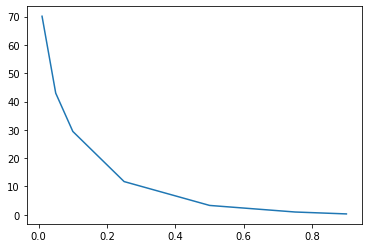

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function amax at 0x114217bf8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[9439.678378168257, 7561.141903868333, 5479.57124752809, 2578.8192262182138, 213.7846042586644, 0.2959824955910971, 0.09979907098026597]


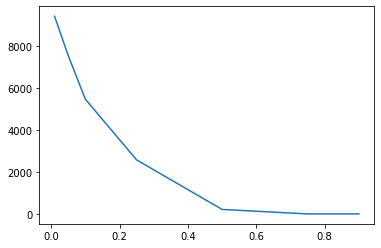

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.1
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.236592416582391, 0.05076133165487417, 0.02627340992105664, 0.00872232577247395, 0.0029496747417983994, 0.0010650518284512941, 0.000359764317807392]


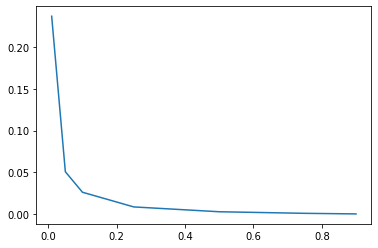

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.25
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.16899889957755254, 0.03356797673008009, 0.017204193865847765, 0.006010138548309612, 0.0019506236891971218, 0.0006355831588292332, 0.00023697998342838501]


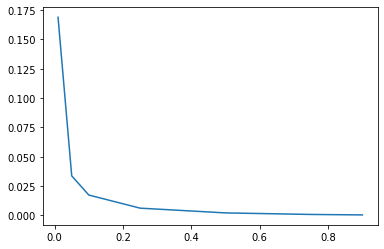

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.5
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.14798123412091746, 0.030966321641795642, 0.013548622549275824, 0.0047390027583296, 0.0016298166208547652, 0.0005384454885553727, 0.00020137981074586116]


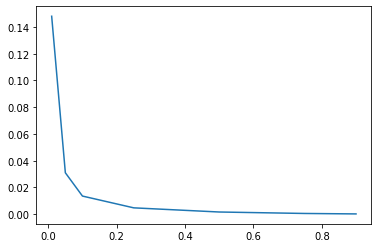

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.75
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.1706825604464136, 0.03535032904097848, 0.01686799803625655, 0.006004084911958286, 0.0019699951292828652, 0.0006951912580260827, 0.00023999720527349846]


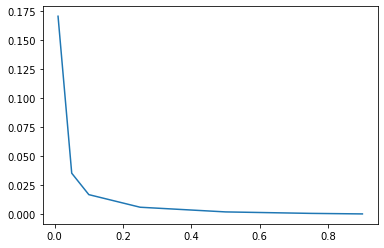

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function mean at 0x11421b950>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[1.9322179636426924, 0.39679913745802525, 0.18696420679349693, 0.062149073100624945, 0.021294635106757245, 0.006684534720599554, 0.002211051915649773]


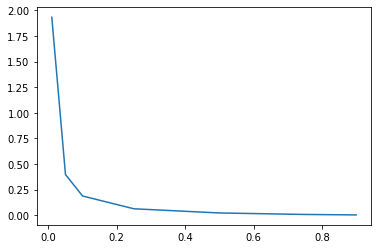

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function std at 0x11421bae8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[54.941095907963884, 26.311200640087314, 13.169834352266385, 3.4618148197189833, 1.0620769566146713, 0.32845741877354706, 0.10272264971654838]


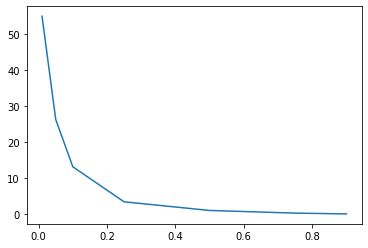

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function amax at 0x114217bf8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[8721.31074455076, 4897.4981218081375, 2518.190418741332, 253.95246821456732, 0.465975583276285, 0.14192319351838895, 0.0490177538847245]


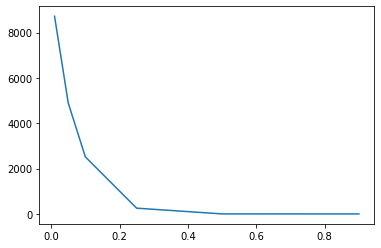

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.1
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.11011490900835182, 0.02102231960742648, 0.010115934186011552, 0.003544183863664408, 0.0011972356773251227, 0.00041551825713395207, 0.00014331956467489505]


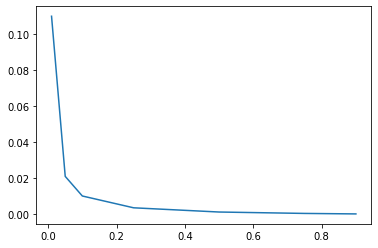

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.25
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.07052163910462812, 0.014738891603471478, 0.0065538012881022935, 0.0023367650524838443, 0.0007492378359055956, 0.00025845981651362044, 9.716342308383579e-05]


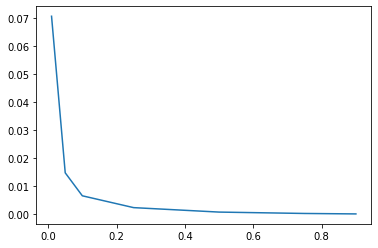

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.5
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.06347230177891515, 0.012358765170288345, 0.005862662982409741, 0.0019367382291371822, 0.0006473546500021466, 0.00020784350317323903, 7.624670167987642e-05]


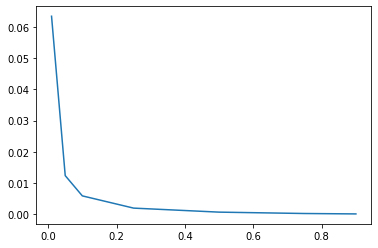

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.75
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.0733202169819531, 0.014995678595755454, 0.007100379440809269, 0.002315173782104899, 0.0007991456295327336, 0.0002662981921188559, 9.121806839711659e-05]


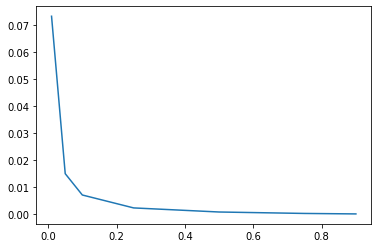

********
***New Example***
dataset size: 
(5000, 5000)
aggregate: 
<function mean at 0x11421b950>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[1.0406173955150204, 0.19178382640979494, 0.08917393839292492, 0.03041599474737954, 0.010248075320616308, 0.003527052490355236, 0.0011655561352059958]


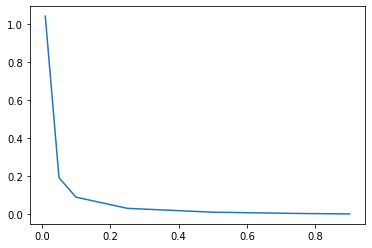

********
***New Example***
dataset size: 
(5000, 5000)
aggregate: 
<function std at 0x11421bae8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[42.27609479686347, 14.13919149990395, 5.847248290311841, 1.5552270051658412, 0.5165883168296518, 0.16703518661834016, 0.05660611726764076]


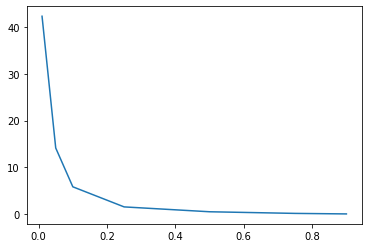

********
***New Example***
dataset size: 
(5000, 5000)
aggregate: 
<function amax at 0x114217bf8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[7712.833532721, 2821.136789286992, 677.386288691036, 2.991371135415425, 0.3458708780946891, 0.11222142645009023, 0.03899786628637417]


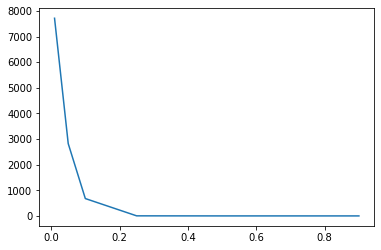

********
***New Example***
dataset size: 
(5000, 5000)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.1
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.057170229311956346, 0.010910208261754966, 0.00542174723800529, 0.001674336082257423, 0.0006037244845390475, 0.00020508441255365515, 6.854079709709982e-05]


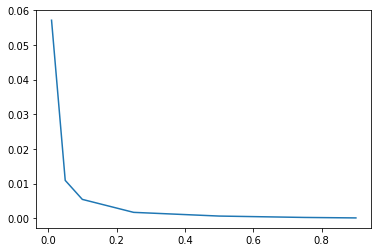

********
***New Example***
dataset size: 
(5000, 5000)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.25
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.03620092478900747, 0.007023580681176745, 0.0034085328272547392, 0.0011509796774682153, 0.00038556457296644173, 0.00012912920570568162, 4.318969090200845e-05]


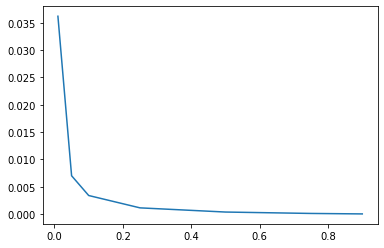

********
***New Example***
dataset size: 
(5000, 5000)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.5
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.02998262941381745, 0.005999847130930948, 0.002954819987462027, 0.0009846363351006468, 0.0003132667045465663, 0.00010865638523412277, 3.7932439041278256e-05]


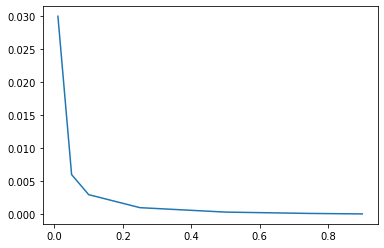

********
***New Example***
dataset size: 
(5000, 5000)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.75
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[0.037826060680320656, 0.00719630234036443, 0.003554050251517303, 0.0011793701533484074, 0.0003904382840906934, 0.0001324439267368533, 4.428510749118833e-05]


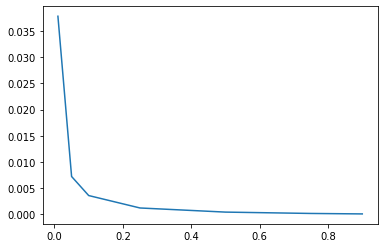

********


In [10]:
#Test with outliers.  Notice much more variation for smaaller sample table sizes
eval_random_sampling_MSE (dataset_sizes, aggregates, sample_table_sizes, True, 1)

***New Example***
dataset size: 
(100, 100)
aggregate: 
<function mean at 0x11421b950>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[6589.608275022283, 1648.8387988658076, 374.61966783613803, 300.41654718206024, 95.85695031548326, 46.56979373665286, 8.443169733048693]


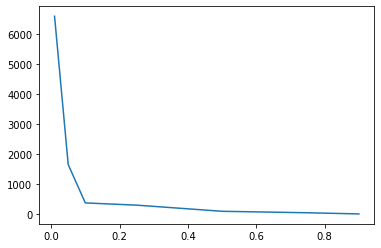

********
***New Example***
dataset size: 
(100, 100)
aggregate: 
<function std at 0x11421bae8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[9715.581946857123, 993.8093790512708, 412.38567586744733, 149.4266476127895, 62.05704994125398, 19.626642149347276, 6.59112911696602]


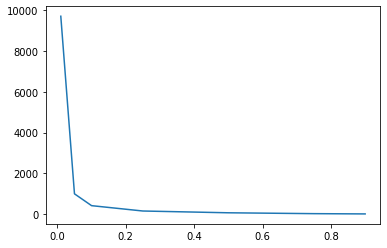

********
***New Example***
dataset size: 
(100, 100)
aggregate: 
<function amax at 0x114217bf8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[78971.94058571625, 22399.721972308187, 13234.267670899888, 5995.551270555922, 2482.7965146219417, 1160.3693623662398, 551.7811299111851]


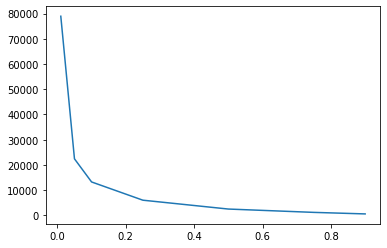

********
***New Example***
dataset size: 
(100, 100)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.1
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[20989.510066855437, 4394.188885431547, 1973.882446042588, 786.6726639960256, 274.7458976495187, 162.06690764014712, 54.7888304029095]


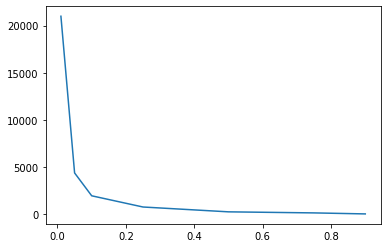

********
***New Example***
dataset size: 
(100, 100)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.25
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[13398.04493587323, 3410.287904608312, 1365.8815735825153, 658.8469541230161, 204.23470194173325, 79.14877340789512, 20.37480311579975]


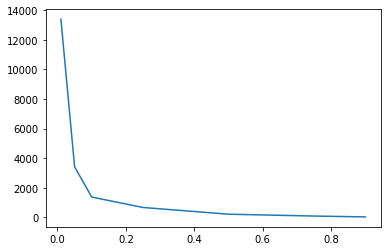

********
***New Example***
dataset size: 
(100, 100)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.5
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[8969.757365250853, 2907.3145945137803, 1179.8467193349215, 431.93380882600616, 170.3200365480244, 78.78203013131099, 30.56869479978575]


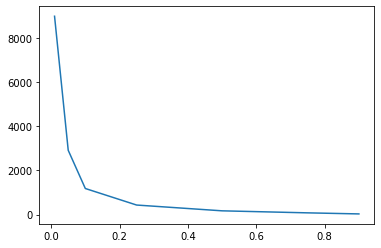

********
***New Example***
dataset size: 
(100, 100)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.75
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[11670.331449049561, 4125.415038593148, 1696.0763665287948, 535.7566755957091, 206.35394084412764, 91.20578013795965, 19.73841728166613]


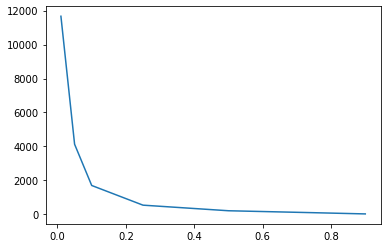

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function mean at 0x11421b950>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[5147.4649076784945, 707.6148003743727, 393.4532498320825, 124.83036221711751, 39.657899119259326, 13.50207389931257, 4.067038596739396]


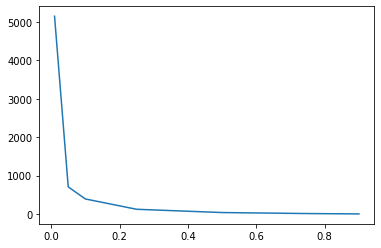

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function std at 0x11421bae8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[3825.8874904694394, 387.6790579981646, 180.88392925076909, 57.236416531448285, 20.96699301353355, 6.648031243511725, 2.179808348051121]


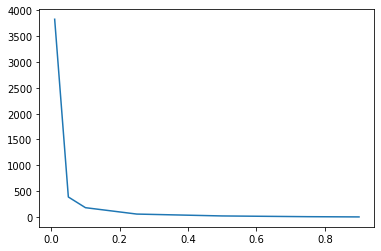

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function amax at 0x114217bf8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[59741.074697248834, 17363.652882815113, 10778.326047164095, 4287.572868679552, 1982.8668476429243, 704.1614097768935, 194.161721879171]


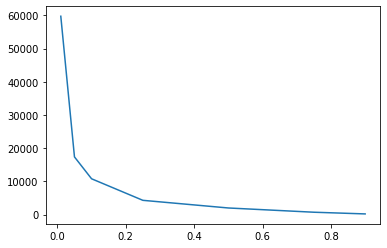

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.1
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[13378.716104893434, 2320.7486026632173, 1015.311260304449, 384.8022447459785, 117.8571660408889, 47.530157613023015, 15.324043047689113]


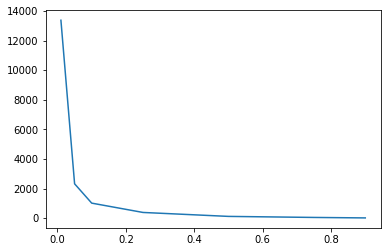

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.25
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[6410.710562145989, 1329.0256422164728, 741.9179755789005, 216.77199917856055, 68.96499250890888, 29.339022156595977, 9.98895905537044]


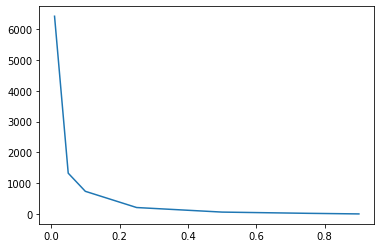

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.5
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[5638.285530446916, 1005.7770362697996, 506.5575631701162, 212.05472699830443, 67.44310349321825, 28.18849876190404, 9.404637072772427]


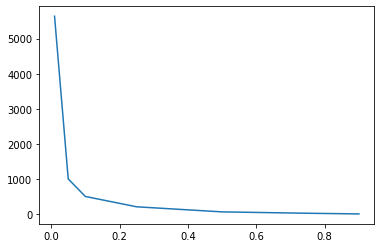

********
***New Example***
dataset size: 
(250, 250)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.75
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[7318.928181924139, 1318.1346199460522, 723.9054099778682, 243.71177642973925, 90.89703483088682, 22.840098545025636, 12.430321360926975]


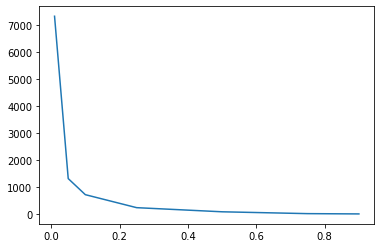

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function mean at 0x11421b950>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[1980.551217979555, 341.0649555583879, 178.12810333378903, 58.015145420972516, 20.186648432014454, 6.376426870119318, 2.026521325076001]


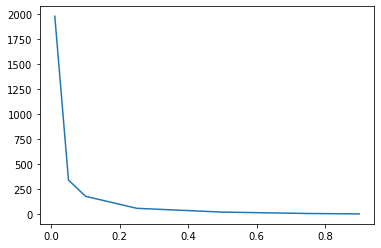

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function std at 0x11421bae8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[1186.9316926637957, 209.0826155380824, 97.77723125022771, 31.13516458335315, 10.202661946946064, 3.6097665296507215, 1.1299507727014049]


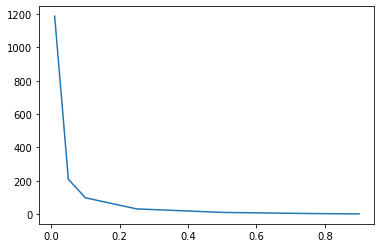

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function amax at 0x114217bf8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[42054.755216717684, 15332.908232957821, 9333.784809238576, 4931.143419197849, 1492.2233946439128, 561.4219233056604, 270.1681336689232]


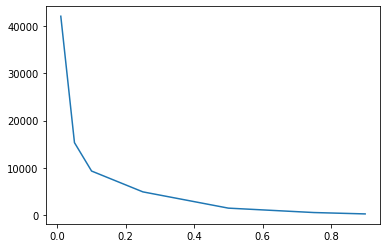

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.1
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[4849.251283116729, 1021.341530166736, 466.4299746933175, 187.92703833024245, 70.56124469017892, 21.05273528097377, 8.253494917115496]


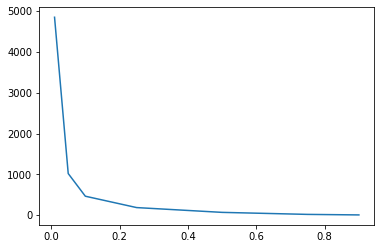

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.25
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[3641.537293649788, 722.3492885789749, 367.6745302907185, 122.59740311252976, 36.60073555346832, 12.700011462228964, 5.548407652300589]


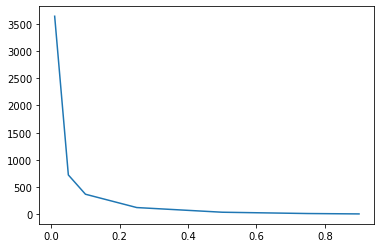

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.5
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[2707.8140858703173, 640.3328646032296, 264.3203560620416, 108.77782627301421, 35.23966121786874, 10.686643896052342, 3.800862305376577]


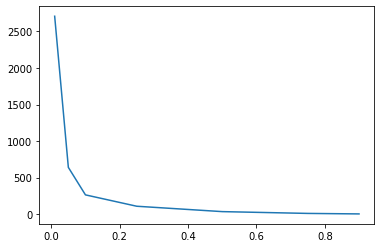

********
***New Example***
dataset size: 
(500, 500)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.75
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[3363.0875581976084, 747.0802266579759, 350.3950604463919, 109.09410037531919, 40.56155444050039, 14.765840796730167, 5.303575895828295]


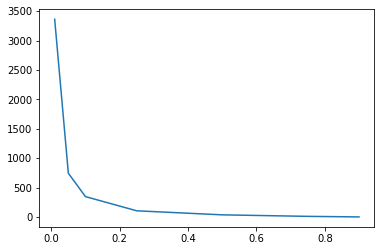

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function mean at 0x11421b950>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[1008.0866497250177, 188.84202783657815, 94.85952848311653, 32.40849558220905, 10.072640965014598, 3.545835241410505, 1.1957905755700464]


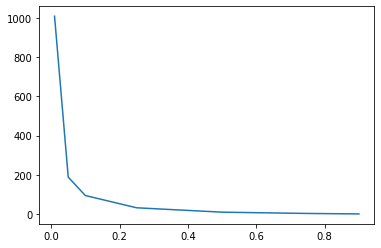

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function std at 0x11421bae8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[535.9672987064569, 100.9422435795938, 45.73499797007854, 16.21777966230117, 4.994846719427023, 1.805082070515946, 0.5374214961135628]


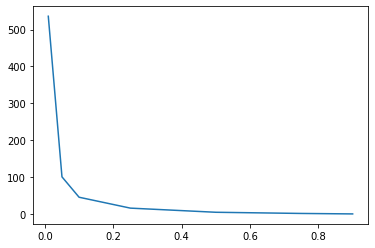

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function amax at 0x114217bf8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[33772.959553126675, 12590.262073667447, 7956.528385500499, 3346.2377094406474, 1386.4174687958339, 514.4033686404222, 145.23451387804343]


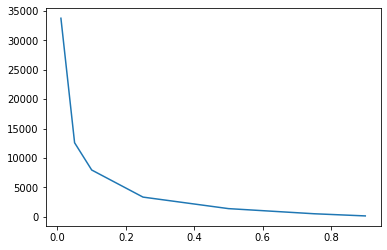

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.1
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[2564.6391295614762, 583.8564668544916, 256.4660163035913, 87.14413822741405, 26.724972588990475, 11.476381361567167, 3.8073765769383363]


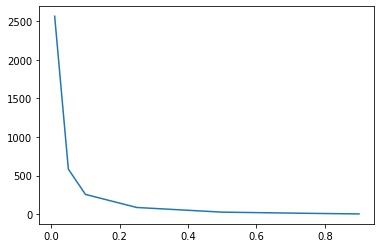

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.25
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[1585.0676566872871, 351.5895812794292, 175.24607332880697, 60.471181808007344, 19.32158371824583, 6.718178179559187, 2.1724729318341103]


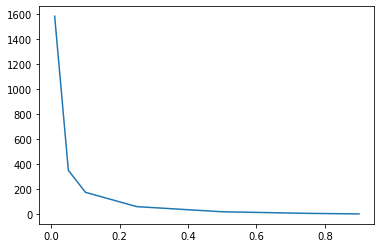

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.5
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[1307.8247546018556, 280.318488787348, 130.49912721479788, 48.0388540561373, 15.893234093494321, 5.641421465141181, 2.1468153973681785]


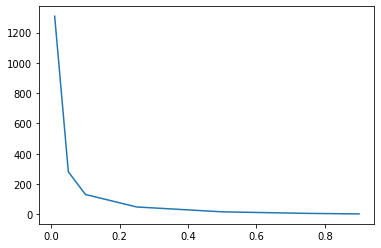

********
***New Example***
dataset size: 
(1000, 1000)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.75
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[1672.1288554153691, 352.30160971821806, 174.68067081744533, 62.3906087189886, 19.073587457104292, 6.354863170573144, 2.3041006955290784]


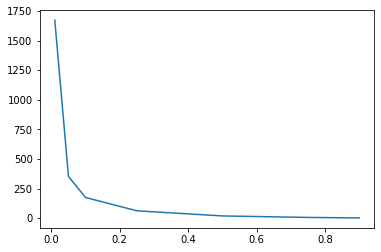

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function mean at 0x11421b950>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[405.5888527849497, 78.00244046636918, 36.05293231913329, 11.969206357560315, 3.9226611498397355, 1.3722792367005, 0.448966739994166]


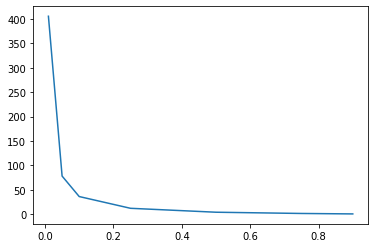

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function std at 0x11421bae8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[201.5023658770603, 36.901458608497094, 17.97212738503503, 5.749575776319338, 2.094317666389616, 0.6481714563390303, 0.22886299052180906]


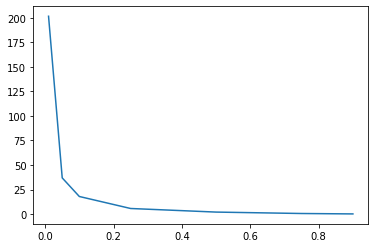

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function amax at 0x114217bf8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[28556.12559704096, 11465.19795339716, 6963.53070634377, 3242.0350870069196, 1326.3036319875898, 405.75960516652526, 145.59358935474592]


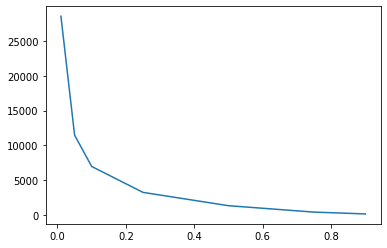

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.1
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[1056.0317368271058, 211.1142405578027, 108.08516125780328, 35.05709590016207, 11.905721439311032, 4.011426656140551, 1.4952541314357521]


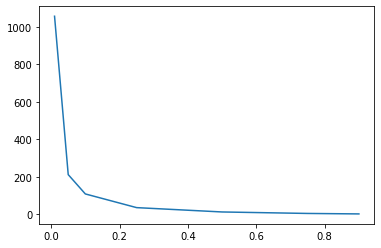

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.25
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[719.335258946302, 140.18941632629583, 70.52195050905365, 23.208285470068848, 7.806544836173399, 2.612261626819069, 0.9526050644733434]


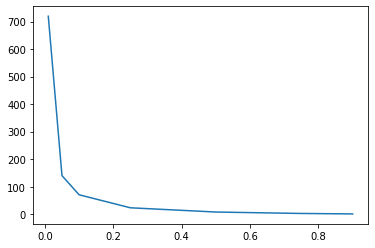

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.5
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[606.3327079714628, 119.4423085206547, 55.320744374281574, 18.654262985551572, 6.3796621054755835, 2.1602746095918475, 0.7385874988746478]


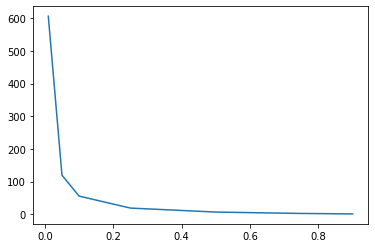

********
***New Example***
dataset size: 
(2500, 2500)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.75
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[728.5648666740958, 136.622454784451, 68.23944065082965, 22.865419875185054, 7.950925588534954, 2.8030027187112427, 0.9131682647912528]


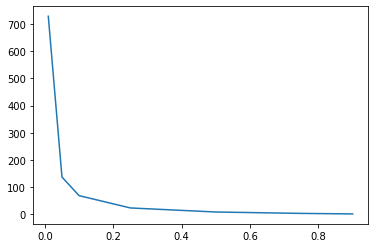

********
***New Example***
dataset size: 
(5000, 5000)
aggregate: 
<function mean at 0x11421b950>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[193.5634956316369, 37.845925601007366, 18.105754257625986, 6.144548407319158, 1.9230907728626634, 0.6948578230722912, 0.21605566950014068]


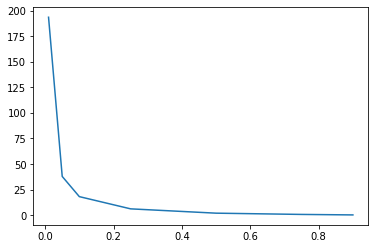

********
***New Example***
dataset size: 
(5000, 5000)
aggregate: 
<function std at 0x11421bae8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[99.19627473150949, 19.491105864189183, 8.765600500294253, 3.022173552884391, 1.0257274968699936, 0.3318924835796695, 0.11365439691467341]


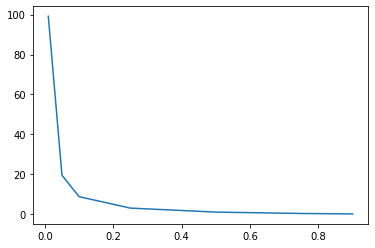

********
***New Example***
dataset size: 
(5000, 5000)
aggregate: 
<function amax at 0x114217bf8>
quantile: 
0
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[23843.74583916021, 9938.049227490172, 6308.672966498149, 2828.2734348219924, 1110.2930786170816, 401.6408717758176, 130.32400151799618]


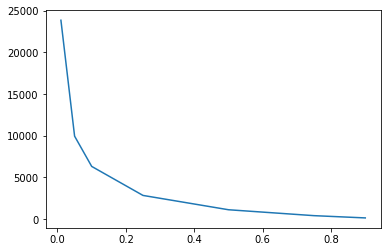

********
***New Example***
dataset size: 
(5000, 5000)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.1
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[568.3368244186188, 109.30165794115835, 52.535541911031444, 18.03720482875704, 6.1079718938564325, 2.058959644026473, 0.7140942642090051]


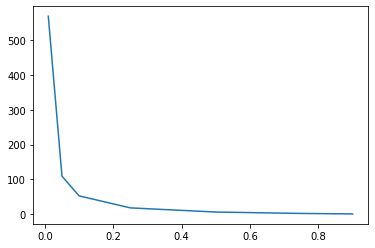

********
***New Example***
dataset size: 
(5000, 5000)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.25
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[372.7636842490916, 69.54408205383409, 33.68730581364904, 11.038030558937573, 3.952192549288504, 1.2480912293583364, 0.45084190387575207]


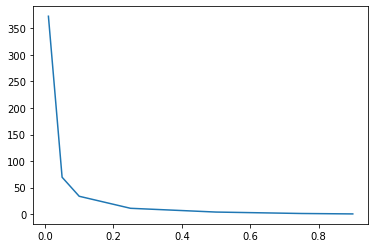

********
***New Example***
dataset size: 
(5000, 5000)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.5
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[302.46262358588365, 59.681230901926604, 28.36283100583694, 9.335989818596394, 3.3278801181396083, 1.1003531610868766, 0.3733239484948015]


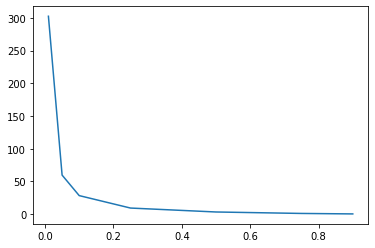

********
***New Example***
dataset size: 
(5000, 5000)
aggregate: 
<function quantile at 0x1143aaf28>
quantile: 
0.75
sample table sizes: 
[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
MSE values: 
[365.49407119890253, 72.6708989554604, 34.14382910040565, 11.277680746795006, 3.752982649703823, 1.3066600111522904, 0.4276080438145777]


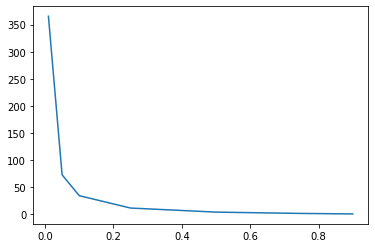

********


In [11]:
#Test with high stdev - notice error scales proportionally
eval_random_sampling_MSE (dataset_sizes, aggregates, sample_table_sizes, True, 100)

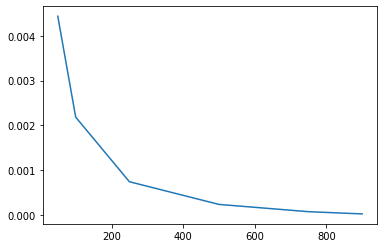

In [12]:
#Test on categorical dataset.  Cat1 = 0:.25, Cat2 = .25:.5, Cat3 = . .5:.75, Cat4 =.75:1 

#Save results
sum_one_category_MSE = []

#data = np.random.normal(loc = 0, scale = 1, size=(1000,1000))
#sample_table_sizes = [50, 100, 250, 500, 750, 900]

data = np.random.normal(loc = 0, scale = 1, size=(50000,50))
sample_table_sizes = [50, 100, 250, 500, 750, 900]

for i in range(0,len(sample_table_sizes)):
    sample_table_size = sample_table_sizes[i]
    sample_table = create_sample_table (sample_table_size, data)
    MSE = 0
    for c in range (0,sample_table.shape[1]):
        num_Cat1_sample = 0
        num_Cat1_actual = 0
        for i in range (0, sample_table.shape[0]):
            if (sample_table[i,c] <= .25):
                num_Cat1_sample += 1
        for i in range (0, data.shape[0]):
            if (data[i,c] <= .25):
                num_Cat1_actual += 1
        sample = num_Cat1_sample/sample_table.shape[0]
        actual = num_Cat1_actual/data.shape[0]
        MSE += (actual-sample)**2
    MSE = MSE/sample_table.shape[1]
    sum_one_category_MSE.append(MSE)
   
plt.plot (sample_table_sizes, sum_one_category_MSE)    

In [13]:
#Second exploration: a quantile approximation algorithm 
#https://pdfs.semanticscholar.org/3593/8dc843cb7ce95be5007ec40e3967ab6bfae8.pdf
def Agrawal_Swami_generic (X, k, p):
    H = []
    tau = p*len(X)
    for x in X:
        contains_x = False
        for e_i in H:
            if (e_i[0] == x):
                e_i[1] += 1
                contains_x = True
                break
        if (contains_x == False):     
            if (len(H) < k):
                if (len(H)==0):
                    H.insert (0, [x,1])
                else:
                    #insert (x,1) maintaining sorted order
                    append = True
                    for i in (range(0,len(H))):
                        if (H[i][0] > x):
                            H.insert (i, [x, 1])
                            append = False
                            break      
                    if (append):
                        H.append ([x,1])
            elif (x < H[0][0]):
                N_1_H = np.sum([entry[1] for entry in H])
                if (N_1_H < tau):
                    H[len(H)-2][1] = H[len(H)-2][1] + H[len(H)-1][1]
                    del H[len(H)-1]
                    #insert (x,1)
                    append = True
                    for i in (range(0,len(H))):
                        if (H[i][0] > x):
                            H.insert (i, [x, 1])
                            append = False
                            break
                    if (append):
                        H.append ([x,1])
            else:
                for i in range(0,len(H)-1):
                    if (H[len(H)-1-i][0]<x):
                        H[len(H)-1-i][1] += 1
                        break
        N_2_H = np.sum([entry[1] for entry in H[1:]])
        if(N_2_H>=tau):
            del H[0]
    return H[0][0]

p_val: 
0.5


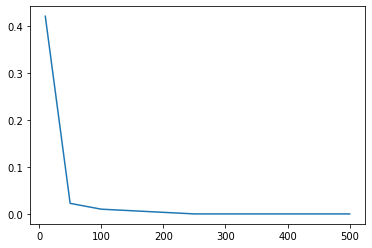

In [14]:
#test on some examples with relative error
X = np.random.randint (0, 1000, (1,100000))[0]
k_sizes = [10, 50, 100, 250, 500]
p_vals = [.5]
for p in p_vals:
    relative_errors = []
    for k in k_sizes:
        approximate_median = Agrawal_Swami_generic(X, k, p)
        median = np.median(X)
        relative_error = abs(approximate_median-median)/approximate_median
        relative_errors.append(relative_error)
    print ("p_val: ")
    print (p)
    plt.plot(k_sizes, relative_errors)
    plt.pause(0.05)
plt.show()

In [ ]:
# Test if we can provide a priori guarantee
def is_possible(quantile, relative_error):
    # quantile, lower, upper = agrawal_swami_func()
    if (upper <= relative_error):
        return True
    return False

In [15]:
#Another quantile summary: http://infolab.stanford.edu/~datar/courses/cs361a/papers/quantiles.pdf
#this is an e-quantile summary
X = np.random.randint (0, 1000, (1,100000))[0]

#an ordered sequence of tuples which correspond to a subset of the observations seen thus far
summary_structure = []


In [16]:
#Pseudocode
def GK_summary (data, e, S):
    for n in range (0,len(data)):
        if (n%(1/2e) == 0):
            compress(S)
        insert(data[n]) 

SyntaxError: invalid syntax (<ipython-input-16-f5d623f270b4>, line 4)

In [ ]:
def quantile (q, e, data):
    n = len(data) 
    #load t_i into T
    s=0
    S = tree with just root node R
    GK_summary(data, e, S):
    r = ceiling (q*n)
    find i s/t both (r-r_min(v_i))<=e*n and (r_max(v_i)-r)<=e*n
    return v_i

In [ ]:
def insert (v)
    find the smallest i s/t v_(i-1) <= v < v_i
    insert tuple (v, 1, floor(2*e*n)) between t_(i-1) and t_i
    if (v = min or max seen):
        insert (v, 1, 0)
    else:
        
    s +=1

In [ ]:
def delete (v_i, v_(i+1)):
    replace (v_i, g_i, delta_i) and (v_(i+1),g_(i+), delta_(i+1) with 
                                     new (v_(i+1),g_i + g_(i+), delta_(i+1))
    s=s-1

In [ ]:
def compress(delta_t, e, n, ):
    for i in range (s-2,0):
        if (band(delta_i,2*e*n)<= band (delta_(i+1), 2*e*n) and (g_i_star + g_(i+1) + delta _(i_1))<2*e*n )
            delete all descendents of t_i and t_i